<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.carrerasenlinea.mx/logos/original/logo-instituto-tecnologico-y-de-estudios-superiores-de-occidente.png" width="150px" height="100px" />

# Laboratorio 3: Behavioral Economics en Trading.


- El propósito: Que utilices la información histórica de la cuenta de trading manual y, mediante la formulación y programación de 3 "Sesgos cognitivos", realices una evaluación del desempeño de la cuenta utilizando el marco de "Behavioral economics". Con la finalidad de inferir si al momento de tomar las decisiones que se tomaron en esa cuenta, se estuvo incurriendo en esos "Sesgos cognitivos" y su impacto en el resultado final.


Equipo 5:

* Luis Ontaneda 
* Alejandro Preciado
* Jose Antonio Quintero
* Ana Paula Rangel


### Sesgo cognitivo elegido: Overconfidence

In [6]:
import pandas as pd
import numpy as np
import json
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [7]:

def f_datosent(P0_archivo):
    """
    :param p0_archivo: archivo de entrada
    :return resultado
    
    debbuging
    p0_archivo = 'archivo_tradeview_2.xlsx'
    
    """
    import pandas as pd
    import numpy as np
    import json
    
    file_type = P0_archivo[-4:]
    # Opciones para visualizar data frames en consola
    pd.set_option('display.max_rows',5000)
    pd.set_option('display.max_columns',500)
    pd.set_option('display.width',1000)
    
    # Ingreso de datos de entrada: Leer archivo JSON
    archivo = P0_archivo
    
    if file_type == 'json':
        with open(archivo, encoding='utf-8-sig') as json_file:
            datos_2 = json.load(json_file)['data']
            
        # Seleccionar la seccion de 'closedTransactions' que es la de interes
        df_datos = pd.DataFrame(datos_2['closedTransactions']['list'])
        
        # Seleccionar solo los renglones de operaciones
        df_datos = df_datos[(df_datos['type'] == 'buy') | (df_datos['type'] == 'sell') | (df_datos['type'] == 's/l') |
                (df_datos['type'] == 't/p')]
        
        # Resetear index para tener todos los numeros de indice completos
        df_datos = df_datos.reset_index()
        
        # Eliminar columnas 'info' e 'index'
        df_datos = df_datos.drop(['info', 'index'], 1)
        
        # Renombrar columnas
        df_datos.rename(columns = {'SL': 'sl', 'TP':'tp', 'price':'openPrice', 'price2':'closePrice', 'item':'Instrument'},
                        inplace=True)
        return df_datos
    elif file_type == 'xlsx':
        df_datos = pd.read_excel(archivo, sheet_name = 'Hoja1', col_header=0)
        return df_datos

In [8]:
#import untitled1
#f_datosent(P0_archivo="archivo_tradeview_0.json")

In [9]:
def f_bf_overconfidence(file):
    from datetime import datetime
    import pandas as pd
    from collections import Counter
    
    df=f_datosent(file)
    file_type = file[-4:]
    
    
    if file_type == 'json': ## función sí los datos vienen en formato json
        
        df["size"]=df["size"].apply(pd.to_numeric)
        df["profit"]=df["profit"].apply(pd.to_numeric)
        
    

        df["closeTime"] = df["closeTime"].apply(lambda x: datetime.strptime(x, '%Y.%m.%d %H:%M:%S'))
        weekly = df.groupby(pd.Grouper(key='closeTime', freq='W'))
        weekly = [weekly.get_group(x) for x in weekly.groups]

        oc = 0
        w = []
        dfs = []
        week= []
        for z in range(len(weekly)):
            wtype = weekly[z].groupby(["type","Instrument"]) ## agrupamos por semana nuestras variables a usar
            wtype = [wtype.get_group(y) for y in wtype.groups] 
            for x in range(len(wtype)):
                for i in range(1,len(wtype[x])):
                    if wtype[x].reset_index().loc[i-1,"profit"] > 0: ## condicion para observar si hubo profit y asi el sujeto es mas propenso a hacer el sesgo
                        if wtype[x].reset_index().loc[i-1,"size"] < wtype[x].reset_index().loc[i,"size"]: ## condición que muestra que el volumen ha subido ya que registro ganancia en ese mismo instrumento
                            oc += 1
                            w.append(z)
                            week.append(wtype[x]["closeTime"].iloc[0])
                            dfs.append(wtype[x])
        dfs = pd.concat(dfs)           
        plt.hist(week)
        plt.title('Sesgo de sobreconfianza', fontsize = "16")
        plt.xticks(rotation=30, color = "red")
        plt.xlabel("fechas en que realizó el sesgo")
        plt.ylabel("veces que realizó el sesgo")
        plt.show()
        

        return dfs
        
    
    
    
    elif file_type == 'xlsx': ## función sí los datos vienen en formato excel

        df["closeTime"] = df["closeTime"].apply(lambda x: datetime.strptime(x, '%Y.%m.%d %H:%M:%S'))
        weekly = df.groupby(pd.Grouper(key='closeTime', freq='W'))
        weekly = [weekly.get_group(x) for x in weekly.groups]

        oc = 0
        w = []
        dfs = []
        week=[]
        for z in range(len(weekly)):
            wtype = weekly[z].groupby(["Type","Symbol"]) ## agrupamos por semana nuestras variables a usar
            wtype = [wtype.get_group(y) for y in wtype.groups] 
            for x in range(len(wtype)):
                for i in range(1,len(wtype[x])):
                    if wtype[x].reset_index().loc[i-1,"Profit"] > 0: ## condicion para observar si hubo profit y asi el sujeto es mas propenso a hacer el sesgo
                        if wtype[x].reset_index().loc[i-1,"Size"] < wtype[x].reset_index().loc[i,"Size"]: ## condición que muestra que el volumen ha subido ya que registro ganancia en ese mismo instrumento
                            oc += 1
                            w.append(z)
                            week.append(wtype[x]["closeTime"].iloc[0])
                            dfs.append(wtype[x])
    dfs = pd.concat(dfs)
    plt.hist(week)
    plt.title('Sesgo de sobreconfianza', fontsize = "16")
    plt.xticks(rotation=30, color = "red")
    plt.xlabel("fechas en que realizó el sesgo")
    plt.ylabel("veces que realizó el sesgo")
    plt.show()

    return (dfs)

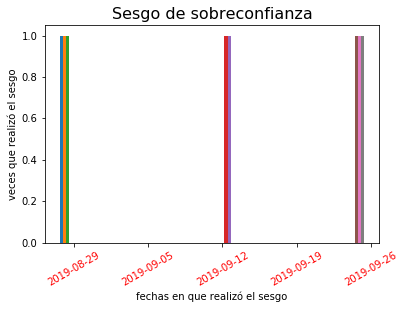

,Order,openTime,Type,Size,Symbol,openPrice,S/L,T/P,closeTime,closePrice,Commission,Taxes,Swap,Profit
3,24373260,2019.08.28 17:11:33,buy,0.01,eurusd,1.10791,1.1040,1.1175,2019-08-29 06:38:28,1.10818,0.0,0,0,0.27
10,24416172,2019.08.29 19:56:26,buy,0.04,eurusd,1.10543,1.1040,0.0000,2019-08-29 19:56:51,1.10518,0.0,0,0,-1.00
11,24416187,2019.08.29 19:57:00,buy,0.05,eurusd,1.10545,1.1015,0.0000,2019-08-30 17:57:14,1.10150,0.0,0,0,-19.75
9,24392456,2019.08.28 17:11:33,buy,0.04,eurusd,1.10791,1.1015,1.1175,2019-08-30 17:57:15,1.10150,0.0,0,0,-25.64
0,24316034,2019.08.27 06:57:50,buy,0.04,xauusd,1529.21000,1523.0000,1543.0000,2019-08-27 09:16:01,1533.69000,0.0,0,0,17.92
12,24417804,2019.08.29 20:33:00,buy,0.05,xauusd,1528.76000,1524.0000,1555.0000,2019-08-29 21:11:08,1523.80000,0.0,0,0,-24.80
13,24432348,2019.08.30 06:55:31,buy,0.05,xauusd,1525.05000,1515.0000,1560.0000,2019-08-30 17:02:21,1528.61000,0.0,0,0,17.80
48,24427784,2019.08.30 02:42:53,sell,0.02,usdjpy,106.49500,106.8000,0.0000,2019-08-30 02:53:33,106.47700,0.0,0,0,0.34
49,24428006,2019.08.30 02:42:53,sell,0.06,usdjpy,106.49500,106.8000,0.0000,2019-08-30 17:02:18,106.14000,0.0,0,0,20.07
23,24766404,2019.09.11 01:52:07,buy,0.01,xauusd,1487.63000,1473.0000,0.0000,2019-09-11 01:52:25,1487.05000,0.0,0,0,-0.58


In [10]:
f_bf_overconfidence("archivo_tradeview_2.xlsx")